In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


In [6]:
data = pd.read_csv('/kaggle/input/dataset0/data.csv')  


In [3]:

data['Story'] = data['Story'].str.replace('[^\w\s]', '').str.lower()


/tmp/ipykernel_32/1541041621.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Story'] = data['Story'].str.replace('[^\w\s]', '').str.lower()


In [4]:
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(data['Story'])


In [5]:
pca = PCA(n_components=2)  # You can adjust the number of components as needed
pca_data = pca.fit_transform(vectorized_data.toarray())

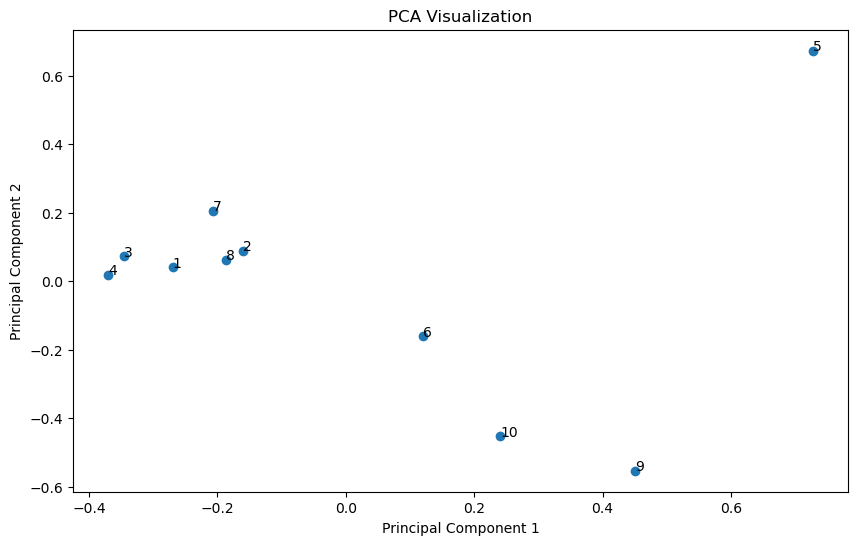

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(pca_data[:, 0], pca_data[:, 1])

# Add labels for each data point
for i, story_id in enumerate(data['Id']):
    plt.annotate(story_id, (pca_data[i, 0], pca_data[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

2 and 8 are both very spontenuous
3 and 4 : resilience 

## Specificity

In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Tokenization
def tokenize_text(text):
    return sent_tokenize(text)

# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)


#  Named Entity Recognition (NER)

def named_entity_recognition(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    ne_tree = ne_chunk(tagged)
    named_entities = []
    for chunk in ne_tree:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            named_entities.append(' '.join(c[0] for c in chunk))
    return named_entities

# Event Extraction
def extract_events(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    events = []
    current_event = []
    for tag in tagged:
        if tag[1].startswith('VB'):
            current_event.append(tag[0])
        elif current_event:
            events.append(' '.join(current_event))
            current_event = []
    if current_event:
        events.append(' '.join(current_event))
    return events





testing

In [8]:
def test_row(data):
    row = data.iloc[0]
    story = row['Story']
    sentences = tokenize_text(story)
    print('Sentences:', sentences)
    tagged_sentences = [pos_tagging(sentence) for sentence in sentences]
    print('Tagged Sentences:', tagged_sentences)
    named_entities = [named_entity_recognition(sentence) for sentence in sentences]
    print('Named Entities:', named_entities)
    events = [extract_events(sentence) for sentence in sentences]
    print('Events:', events)

test_row(data)

Sentences: ['the loss of my father will forever leave an indelible mark on my heart it also provided me with an unwavering strength.', 'It shaped me into a more resilient and compassionate person capable of facing adversity with newfound determination.', "I carry my father's memory with me drawing inspiration from his life and the lessons he imparted.", 'Through this turning point I have learned that strength can emerge from even the darkest moments and I am committed to living a life that honors his legacy.']
Tagged Sentences: [[('the', 'DT'), ('loss', 'NN'), ('of', 'IN'), ('my', 'PRP$'), ('father', 'NN'), ('will', 'MD'), ('forever', 'VB'), ('leave', 'VB'), ('an', 'DT'), ('indelible', 'JJ'), ('mark', 'NN'), ('on', 'IN'), ('my', 'PRP$'), ('heart', 'NN'), ('it', 'PRP'), ('also', 'RB'), ('provided', 'VBD'), ('me', 'PRP'), ('with', 'IN'), ('an', 'DT'), ('unwavering', 'JJ'), ('strength', 'NN'), ('.', '.')], [('It', 'PRP'), ('shaped', 'VBD'), ('me', 'PRP'), ('into', 'IN'), ('a', 'DT'), ('mo

In [1]:
row = data.iloc[1]
story = row['Story']
sentences = tokenize_text(story)
events = [extract_events(sentence) for sentence in sentences] 
print('Events:', events)

NameError: name 'data' is not defined

In [9]:
row = data.iloc[1]  # Get the first row of the DataFrame

story = row['Story']

# Step 1: Tokenization
sentences = tokenize_text(story)
print('Sentences:', sentences)

# Step 2: Part-of-Speech (POS) Tagging
tagged_sentences = [pos_tagging(sentence) for sentence in sentences]
print('Tagged Sentences:', tagged_sentences)

# Step 4: Named Entity Recognition (NER)
named_entities = [named_entity_recognition(sentence) for sentence in sentences]
print('Named Entities:', named_entities)

# Step 5: Event Extraction
events = [extract_events(sentence) for sentence in sentences]
print('Events:', events)


Sentences: ['i adopted a cat 7 months ago i wasnt planning it and it was like a dream to me and one day my mom entered the house with a kitten in her hands and it was the happiest day of my life i couldnt believe it and since then lili  my cat became the only being that i really love from the bottom of my heart']
Tagged Sentences: [[('i', 'NN'), ('adopted', 'VBD'), ('a', 'DT'), ('cat', 'JJ'), ('7', 'CD'), ('months', 'NNS'), ('ago', 'IN'), ('i', 'JJ'), ('wasnt', 'VBP'), ('planning', 'VBG'), ('it', 'PRP'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('like', 'IN'), ('a', 'DT'), ('dream', 'NN'), ('to', 'TO'), ('me', 'PRP'), ('and', 'CC'), ('one', 'CD'), ('day', 'NN'), ('my', 'PRP$'), ('mom', 'NN'), ('entered', 'VBD'), ('the', 'DT'), ('house', 'NN'), ('with', 'IN'), ('a', 'DT'), ('kitten', 'NN'), ('in', 'IN'), ('her', 'PRP$'), ('hands', 'NNS'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('happiest', 'JJS'), ('day', 'NN'), ('of', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('

NE was not able to capture any named entity. Let's try with other ones: 

## Spacy :

In [9]:
import spacy

def named_entity_recognition_spacy(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents]
    return named_entities


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
named_entities = [named_entity_recognition_spacy(sentence) for sentence in sentences]
print('Named Entities:', named_entities)

Named Entities: [['7 months ago']]


In [14]:
def test_row(data):
    row = data.iloc[1]
    story = row['Story']
    sentences = tokenize_text(story)
    print('Sentences:', sentences)
    tagged_sentences = [pos_tagging(sentence) for sentence in sentences]
    print('Tagged Sentences:', tagged_sentences)
    named_entities = [named_entity_recognition_spacy(sentence) for sentence in sentences]
    print('Named Entities:', named_entities)
    events = [extract_events(sentence) for sentence in sentences]
    print('Events:', events)

test_row(data)

Sentences: ['I adopted a cat 7 months ago i wasn’t planning it and it was like a dream to me.', 'And one day my mom entered the house with a kitten in her hands and it was the happiest day of my life i couldn’t believe it.', 'And since then lili ( my cat) became the only being that i really love from the bottom of my heart']
Tagged Sentences: [[('I', 'PRP'), ('adopted', 'VBD'), ('a', 'DT'), ('cat', 'JJ'), ('7', 'CD'), ('months', 'NNS'), ('ago', 'IN'), ('i', 'JJ'), ('wasn', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('planning', 'VBG'), ('it', 'PRP'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('like', 'IN'), ('a', 'DT'), ('dream', 'NN'), ('to', 'TO'), ('me', 'PRP'), ('.', '.')], [('And', 'CC'), ('one', 'CD'), ('day', 'NN'), ('my', 'PRP$'), ('mom', 'NN'), ('entered', 'VBD'), ('the', 'DT'), ('house', 'NN'), ('with', 'IN'), ('a', 'DT'), ('kitten', 'NN'), ('in', 'IN'), ('her', 'PRP$'), ('hands', 'NNS'), ('and', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('happiest', 'JJS'), ('day', 'NN

## StanfordNER 

In [11]:
from nltk.tag import StanfordNERTagger
import os

def named_entity_recognition_stanford(text):
    st = StanfordNERTagger('path_to/stanford-ner.jar', 'path_to/stanford-ner-3.9.2/classifiers/english.all.3class.distsim.crf.ser.gz')
    tokens = nltk.word_tokenize(text)
    classified_tokens = st.tag(tokens)
    named_entities = [token[0] for token in classified_tokens if token[1] != 'O']
    return named_entities


In [13]:
named_entities = [named_entity_recognition_spacy(sentence) for sentence in sentences]
print('Named Entities:', named_entities)

Named Entities: [['7 months ago']]


# Personal Context 

In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models

def evaluate_personal_context(text):
    # Tokenize text into sentences
    sentences = nltk.sent_tokenize(text)

    # Sentiment Analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in sentences]

    # Topic Modeling
    tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]
    dictionary = corpora.Dictionary(tokenized_sentences)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_sentences]
    lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

    # Extract most significant topics
    topics = [lda_model.get_document_topics(doc) for doc in corpus]
    most_significant_topics = [max(topic, key=lambda x: x[1]) for topic in topics]

    # Get actual topics
    actual_topics = [lda_model.print_topic(topic[0]) for topic in most_significant_topics]

    # Return sentiment scores and actual topics
    return sentiment_scores, actual_topics


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
def test_personal_context():
    text = "The loss of my father will forever leave an indelible mark on my heart. But im so happy that he died"
    sentiment_scores, actual_topics = evaluate_personal_context(text)
    print("Sentiment Scores:", sentiment_scores)
    print("Actual Topics:")
    for topic in actual_topics:
        print(topic)
test_personal_context()

Sentiment Scores: [-0.3612, 0.4043]
Actual Topics:
0.105*"my" + 0.060*"indelible" + 0.060*"father" + 0.060*"on" + 0.060*"of" + 0.060*"an" + 0.060*"." + 0.060*"forever" + 0.060*"leave" + 0.060*"mark"
0.095*"so" + 0.094*"died" + 0.092*"that" + 0.090*"happy" + 0.089*"he" + 0.089*"but" + 0.088*"im" + 0.026*"my" + 0.026*"the" + 0.026*"loss"


n the context of topic modeling with LDA, the weights assigned to each word in a topic represent the importance or prevalence of that word within the topic. In the output you provided, the word "my" has the highest weight of 0.102 for the extracted topic.

A high weight for the word "my" suggests that it is a significant term within the topic identified by the LDA model. This means that the word "my" occurs frequently and carries substantial importance within the text when discussing the particular topic associated with that topic index.

In this case, it indicates that personal ownership or possession, likely related to the topic of loss and enduring emotional impact, plays a prominent role in the text. The word "my" may be indicating a personal connection or the speaker's individual perspective in relation to the topic being discussed.

Understanding the significance of individual words and their weights within a topic can help provide insights into the key themes and subjects present in the text.

## Sensory details 

In [21]:
import nltk

def analyze_sensory_details(text):
    sentences = nltk.sent_tokenize(text)

    sensory_keywords = {
        'sight': ['see', 'look', 'watch'],
        'sound': ['hear', 'listen', 'sound'],
        'smell': ['smell', 'scent', 'aroma'],
        'taste': ['taste', 'flavor'],
        'touch': ['feel', 'touch', 'texture']
    }

    sensory_details = []
    for sentence in sentences:
        lower_sentence = sentence.lower()
        for sense, keywords in sensory_keywords.items():
            for keyword in keywords:
                if keyword in lower_sentence:
                    sensory_details.append({'sense': sense, 'sentence': sentence})
                    break

    return sensory_details


In [23]:
def test_sensory_details():
    text = "The loss of my father will forever leave an indelible mark on my heart. But im so happy that he died"
    sensory_details = analyze_sensory_details(text)
    print("Sensory Details:")
    for detail in sensory_details:
        print(f"{detail['sense']}: {detail['sentence']}")
test_sensory_details()

Sensory Details:
sound: The loss of my father will forever leave an indelible mark on my heart.


## Phenominal experience 

using emotional analysis 

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_emotional_tone(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

speech = "The loss of my father will forever leave an indelible mark on my heart. But im so happy that he died"

emotion_scores = analyze_emotional_tone(speech)
print("Emotion Scores:", emotion_scores)


Emotion Scores: {'neg': 0.246, 'neu': 0.589, 'pos': 0.164, 'compound': -0.0922}


## Truthfulness